# Homework 4 - Programming Section Notebook

## Context

Given a dataset of bank client accounts and a target variable describing wether or not the client has a term deposit, create an unsupervised learning predictor through clustering of the data.

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_file_path = "accounts.csv"

data_df = pd.read_csv(dataset_file_path)
data_df.drop_duplicates()

data_labels = data_df.columns
n_labels_to_keep = 8

#np.where(pd.isnull(data_df)) 
#np.where(pd.isna(data_df))
#both return 0, so no null or missing entries

X = data_df.drop(axis=1, labels=data_labels[n_labels_to_keep:])


for label in data_labels[0:n_labels_to_keep]:
    if label != 'age' and label != 'balance': #these two categories are numerical
        X[label] = [np.where(x)[0][0] for x in pd.get_dummies(X[label], dtype='int64').values]

y = pd.get_dummies(data_df["deposit"], drop_first=True, dtype='int64') # 1 - "yes", 0 - "no"
X

,age,job,marital,education,default,balance,housing,loan
0,59,0,1,1,0,2343,1,0
1,56,0,1,1,0,45,0,0
2,41,9,1,1,0,1270,1,0
3,55,7,1,1,0,2476,1,0
4,54,0,1,2,0,184,0,0
...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0
11158,39,7,1,1,0,733,0,0
11159,32,9,2,1,0,29,0,0
11160,43,9,1,1,0,0,0,1


## 1 - Clustering when normalizing the data using MinMaxScaler

In [156]:
from sklearn.preprocessing import MinMaxScaler

## MinMaxScaler Data Normalization
scaler = MinMaxScaler()
scaler.fit(X) 

X_scaled = pd.DataFrame(scaler.transform(X), columns=data_labels[0:8])

X_scaled

,age,job,marital,education,default,balance,housing,loan
0,0.532468,0.000000,0.5,0.333333,0.0,0.104371,1.0,0.0
1,0.493506,0.000000,0.5,0.333333,0.0,0.078273,0.0,0.0
2,0.298701,0.818182,0.5,0.333333,0.0,0.092185,1.0,0.0
3,0.480519,0.636364,0.5,0.333333,0.0,0.105882,1.0,0.0
4,0.467532,0.000000,0.5,0.666667,0.0,0.079851,0.0,0.0
...,...,...,...,...,...,...,...,...
11157,0.194805,0.090909,1.0,0.000000,0.0,0.077773,1.0,0.0
11158,0.272727,0.636364,0.5,0.333333,0.0,0.086086,0.0,0.0
11159,0.181818,0.818182,1.0,0.333333,0.0,0.078091,0.0,0.0
11160,0.324675,0.818182,0.5,0.333333,0.0,0.077762,0.0,1.0


### 1.a) SSE for each number of clusters, per different ks when applying k-means clustering

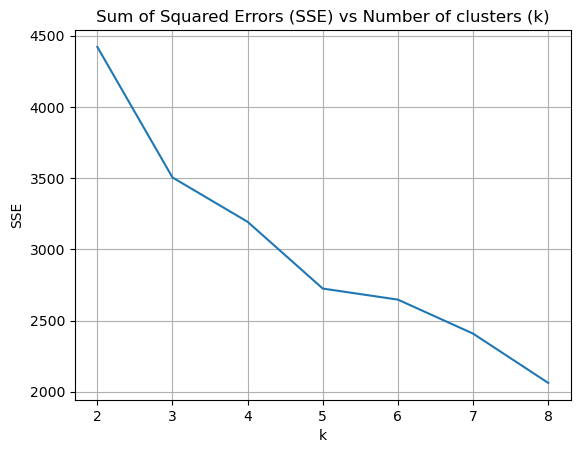

In [157]:
from sklearn.cluster import KMeans

k_arr = [2,3,4,5,6,7,8] #Number of clusters

sse_arr = []

for k in k_arr:
    cluster = KMeans(n_clusters=k,max_iter=500,random_state=42)
    cluster.fit(X_scaled)
    sse_arr.append(cluster.inertia_)

sse_df = pd.DataFrame({
    'k': k_arr,
    'SSE': sse_arr
})

sns.lineplot(data=sse_df,x='k', y='SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Sum of Squared Errors (SSE) vs Number of clusters (k)")
plt.grid()
plt.show()

### 1.c) Aiding code

In [158]:
data_df.drop(axis=1, labels="deposit").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


## 2 - Clustering when normalizing the data using StandardScaler

In [159]:
from sklearn.preprocessing import StandardScaler

## StandardScaler Data Normalization
scaler = StandardScaler()
scaler.fit(X)

X_scaled = pd.DataFrame(scaler.transform(X), columns=data_labels[0:8])

X_scaled


,age,job,marital,education,default,balance,housing,loan
0,1.491505,-1.391604,-0.318672,-0.380501,-0.123617,0.252525,1.055280,-0.387923
1,1.239676,-1.391604,-0.318672,-0.380501,-0.123617,-0.459974,-0.947616,-0.387923
2,-0.019470,1.399105,-0.318672,-0.380501,-0.123617,-0.080160,1.055280,-0.387923
3,1.155733,0.778947,-0.318672,-0.380501,-0.123617,0.293762,1.055280,-0.387923
4,1.071790,-1.391604,-0.318672,0.953822,-0.123617,-0.416876,-0.947616,-0.387923
...,...,...,...,...,...,...,...,...
11157,-0.691015,-1.081525,1.279987,-1.714823,-0.123617,-0.473616,1.055280,-0.387923
11158,-0.187357,0.778947,-0.318672,-0.380501,-0.123617,-0.246658,-0.947616,-0.387923
11159,-0.774958,1.399105,1.279987,-0.380501,-0.123617,-0.464934,-0.947616,-0.387923
11160,0.148416,1.399105,-0.318672,-0.380501,-0.123617,-0.473926,-0.947616,2.577830


### 2.a) Applying PCA to data

In [162]:
from sklearn.decomposition import PCA

X_scaled_col_names = X_scaled.columns

decomposer = PCA(n_components=2)
X_reduced = decomposer.fit_transform(X_scaled)

print(decomposer.get_feature_names_out(X_scaled_col_names))
principal_components = [X_scaled_col_names[int(decomposer.get_feature_names_out(X_scaled_col_names)[0][-1])], X_scaled_col_names[int(decomposer.get_feature_names_out(X_scaled_col_names)[1][-1])]]
print(principal_components)
print(decomposer.explained_variance_)
print(decomposer.explained_variance_ratio_)
print(decomposer.singular_values_)


['pca0' 'pca1']
['age', 'job']
[1.54490546 1.37573062]
[0.19309588 0.17195092]
[131.31142296 123.91339479]


### 2.b) Scatterplot according to first 2 principal components

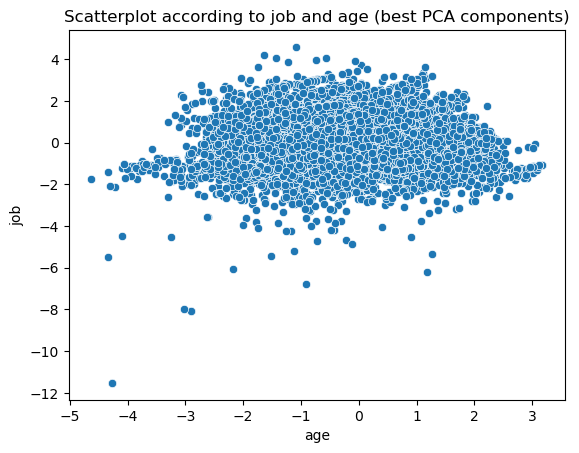

In [163]:
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1])
plt.xlabel(principal_components[0])
plt.ylabel(principal_components[1])
plt.title("Scatterplot according to job and age (best PCA components)")
plt.show()

       0
0      2
1      0
2      1
3      0
4      0
...   ..
11157  2
11158  0
11159  1
11160  2
11161  1

[11162 rows x 1 columns]


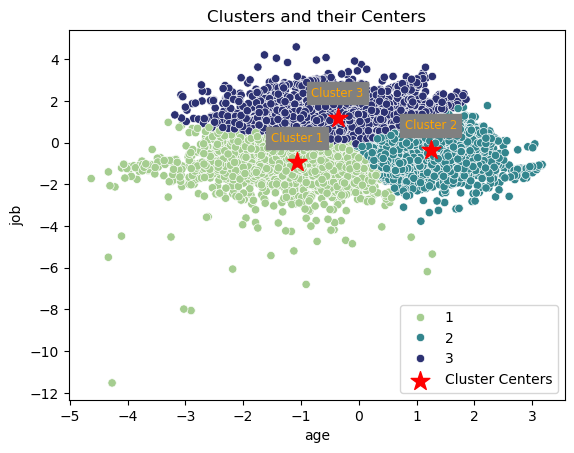

In [166]:
cluster = KMeans(n_clusters=3, random_state=42)
cluster.fit(X_reduced)
clusters_prediction = cluster.predict(X_reduced)
#print(pd.DataFrame(clusters_prediction))

cluster_centers_df = pd.DataFrame(cluster.cluster_centers_, columns=principal_components)

sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=(clusters_prediction+1), palette="crest")

plt.scatter(cluster_centers_df[principal_components[0]], cluster_centers_df[principal_components[1]], 
            marker='*', s=200, c='red', label='Cluster Centers')

for i, center in cluster_centers_df.iterrows():
    plt.annotate(f'Cluster {i+1}', (center[principal_components[0]], center[principal_components[1]]), 
                 textcoords="offset points", xytext=(0,15), ha='center', color="orange", backgroundcolor = "gray", fontsize="small")
                 


plt.xlabel(principal_components[0])
plt.ylabel(principal_components[1])
plt.title("Clusters and their Centers")
plt.legend()
plt.show()

### 2.c) Cluster conditional features of "job" and "education", from cluster using first 2 principal components

[]

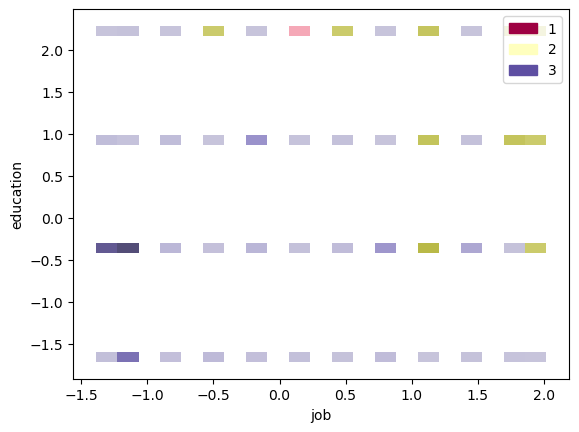

In [188]:
component_names = ["job", "education"]

sns.histplot(X_scaled, x=component_names[0], y=component_names[1], hue=(clusters_prediction+1), multiple="dodge", stat="density", shrink=0.8, common_norm=False, palette="Spectral")
plt.plot()

c:\Users\jppf2\anaconda3\envs\Projeto_Aprendizagem\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'stat', 'shrink'
  cset = contour_func(


[]

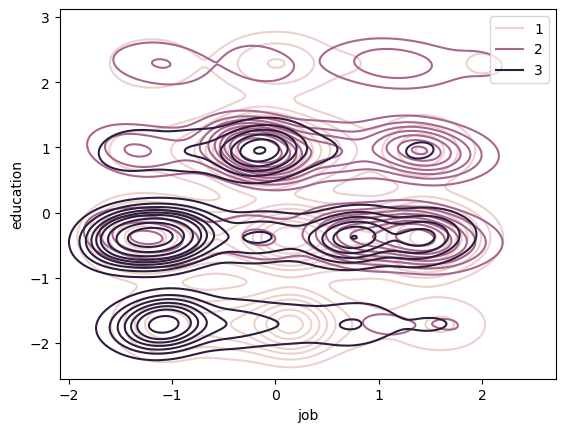

In [178]:
component_names = ["job", "education"]

sns.kdeplot(X_scaled, x=component_names[0], y=component_names[1], hue=(clusters_prediction+1), multiple="dodge", stat="density", shrink=0.8, common_norm=False)
plt.plot()